# Introduction [Cuong Nguyen]

In [345]:
%reset -f

In [346]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')  # default style
import tensorflow as tf
np.set_printoptions(precision=3, suppress=True)  # improve float readability
#from sklearn import datasets
from sklearn.model_selection import train_test_split

# Document Data Preparation/Cleaning [David]

## Loading data [David]

In [347]:
data_file = "./data/final_dataset_20241126.csv"
df_original = pd.read_csv(data_file, encoding='latin-1')

In [348]:
# Rename columns 

# df_spotify=df_spotify.rename(columns={'Unnamed: 0':'spotify_track_id'}, inplace=True)

# Data Processing [Hildah/Cuong Nguyen] 

### Determine throwaway columns - For text enrichment @Cuong Nguyen
Dropped Unnamed: 0 because didnt seem valuable

Dropped 'analysis_url','track_href','uri' because it is a URL, identifiers of some sort

Dropped id becuase it is a unique identifier

Dropped 'search_type' becuase they all seamed to be track/artists

Dropped type becuase it is just the same = ['audio_features', nan]

KEpt artist and title because some contextually the artist and song titles may influence the dandeability in some way.

In [349]:
df_original.shape

(4600, 51)

In [350]:
df_original.columns

Index(['Unnamed: 0', 'Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track', 'title_artist_id', 'isrc_track_id',
       'spotify_track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [351]:
# Print the data types of each column
print(df_original.dtypes)

Unnamed: 0                      int64
Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud S

In [352]:
# Check for missing values in each column
missing_values = df_original.isnull().sum()

# Print the number of missing values per column
print(missing_values.sort_values(ascending=False))


TIDAL Popularity              4600
isrc_track_id                 4248
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
title_artist_id                384
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
valence                         32
acousticness                    32
instrumentalness                32
liveness                        32
duration_ms                     32
uri                 

In [353]:
# Make columns into int values
def coerce_to_int(list_of_columns):
    '''
    Checks the data type of the columns passed against the original dataset
      Args:
      list_of_columns: a list of columns to be checked

      Returns:
       List of columns that have not successfully been coerced
    '''
    non_successful_list=[]
    for col in list_of_columns:
        try:
            #df_original[col] = df_original[col].str.replace(',', '').astype('float64')
            if df_original[col].dtype not in ['int64', 'float64']:
                df_original[col] = df_original[col].astype(str).str.replace(',', '', regex=False)
                df_original[col] = df_original[col].astype(str).str.replace('nan', '0', regex=False)
                df_original[col]  = df_original[col].fillna(0) 
                df_original[col] = df_original[col].astype(int)
        except Exception as e:
            non_successful_list.append(col)
    return non_successful_list

In [354]:
missing_values_list=missing_values[missing_values > 0]
missing_values_list.sort_values(ascending=False)

TIDAL Popularity              4600
isrc_track_id                 4248
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
title_artist_id                384
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
liveness                        32
duration_ms                     32
analysis_url                    32
track_href                      32
uri                             32
id                  

In [355]:
# Check the values for each column to be dropped
for i in df_original.columns:
    print(df_original[i].head(5))

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64
0           MILLION DOLLAR BABY
1                   Not Like Us
2    i like the way you kiss me
3                       Flowers
4                       Houdini
Name: Track, dtype: object
0    Million Dollar Baby - Single
1                     Not Like Us
2      I like the way you kiss me
3                Flowers - Single
4                         Houdini
Name: Album Name, dtype: object
0     Tommy Richman
1    Kendrick Lamar
2           Artemas
3       Miley Cyrus
4            Eminem
Name: Artist, dtype: object
0    4/26/2024
1     5/4/2024
2    3/19/2024
3    1/12/2023
4    5/31/2024
Name: Release Date, dtype: object
0    QM24S2402528
1    USUG12400910
2    QZJ842400387
3    USSM12209777
4    USUG12403398
Name: ISRC, dtype: object
0    1
1    2
2    3
3    4
4    5
Name: All Time Rank, dtype: object
0    725.4
1    545.9
2    538.4
3    444.9
4    423.3
Name: Track Score, dtype: float64
0      390,470,936
1      323,703

In [356]:
columns_for_processing=coerce_to_int(missing_values_list.index.to_list())
columns_for_processing

['Artist',
 'title_artist_id',
 'isrc_track_id',
 'spotify_track_id',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url']

In [357]:
# Check for other non float and non int columnd for removal
for i in df_original.columns:
    if df_original[i].dtype==object:
        if i not in columns_for_processing:
            columns_for_processing.append(i)

columns_for_processing

['Artist',
 'title_artist_id',
 'isrc_track_id',
 'spotify_track_id',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'Track',
 'Album Name',
 'Release Date',
 'ISRC',
 'All Time Rank']

In [358]:
#columns_for_processing.remove('Artist')
columns_for_processing

['Artist',
 'title_artist_id',
 'isrc_track_id',
 'spotify_track_id',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'Track',
 'Album Name',
 'Release Date',
 'ISRC',
 'All Time Rank']

In [359]:
# Drop the columns with missing values above 1000 that could not be coerced into float
df_original = df_original.drop(columns_for_processing,axis=1)

In [360]:
# Check for missing values in each column
missing_values = df_original.isnull().sum()

# Print the number of missing values per column
print(missing_values.sort_values(ascending=False))

TIDAL Popularity              4600
Amazon Playlist Count         1055
Deezer Playlist Count          921
Spotify Popularity             804
Apple Music Playlist Count     561
loudness                        32
danceability                    32
energy                          32
key                             32
time_signature                  32
speechiness                     32
acousticness                    32
instrumentalness                32
liveness                        32
valence                         32
tempo                           32
duration_ms                     32
mode                            32
Shazam Counts                    0
Explicit Track                   0
Unnamed: 0                       0
Soundcloud Streams               0
Pandora Track Stations           0
Track Score                      0
Deezer Playlist Reach            0
SiriusXM Spins                   0
AirPlay Spins                    0
YouTube Playlist Reach           0
TikTok Views        

In [361]:
# Drop tidal popularity
df_original = df_original.drop(['TIDAL Popularity'],axis=1)

In [362]:
# Check numeric columns
numeric_cols = df_original.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Unnamed: 0', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [363]:
### “Filling” of null data with average for numeric values
column_means = df_original[numeric_cols].mean()
df_original.fillna(column_means)


,Unnamed: 0,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,725.4,390470936,30716,196631588,92.0,84274754,1713126,5767700,651565900,...,-5.520,0.0,0.0439,0.097300,0.000370,0.0678,0.919,138.029,155152.0,4.0
1,1,545.9,323703884,28113,174597137,92.0,116347040,3486739,674700,35223547,...,-7.001,1.0,0.0776,0.010700,0.000000,0.1410,0.214,101.061,274192.0,4.0
2,2,538.4,601309283,54331,211607669,92.0,122599116,2228730,3025400,275154237,...,-4.263,1.0,0.0447,0.000938,0.010600,0.0826,0.747,151.647,142515.0,4.0
3,3,444.9,2031280633,269802,136569078,85.0,1096100899,10629796,7189811,1078757968,...,-4.775,1.0,0.0633,0.058400,0.000070,0.0232,0.632,118.048,200600.0,4.0
4,4,423.3,107034922,7223,151469874,88.0,77373957,3670188,16400,0,...,-2.760,0.0,0.0683,0.029200,0.000002,0.0582,0.889,127.003,227239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,19.4,305049963,65770,5103054,71.0,149247747,1397590,48370,20202000,...,-9.612,1.0,0.5520,0.073500,0.000003,0.0953,0.230,140.078,156081.0,4.0
4596,4596,19.4,52282360,4602,1449767,56.0,943920245,5347766,0,1721,...,-4.200,1.0,0.0473,0.349000,0.000002,0.6640,0.470,163.748,236000.0,4.0
4597,4597,19.4,189972685,72066,6704802,65.0,201027333,1081402,7596,5288677,...,-6.263,0.0,0.3600,0.384000,0.000000,0.1090,0.179,123.023,203438.0,4.0
4598,4598,19.4,145467020,14037,7387064,66.0,1118595159,3868828,11433,2534831,...,-5.207,0.0,0.0519,0.110000,0.000003,0.2270,0.260,96.953,237876.0,4.0


In [364]:
# Drop Duplicates based on 'Unnamed: 0'
df_original = df_original.drop_duplicates(subset='Unnamed: 0', keep='first')

In [365]:
# Check shape
df_original.shape

(4600, 36)

In [366]:
# Drop non-numeric columns except Artist
# We shall creating one hot encoding based on artist later
original_cols=df_original.columns
non_numeric_cols= [x for x in original_cols if x not in numeric_cols]
non_numeric_cols

[]

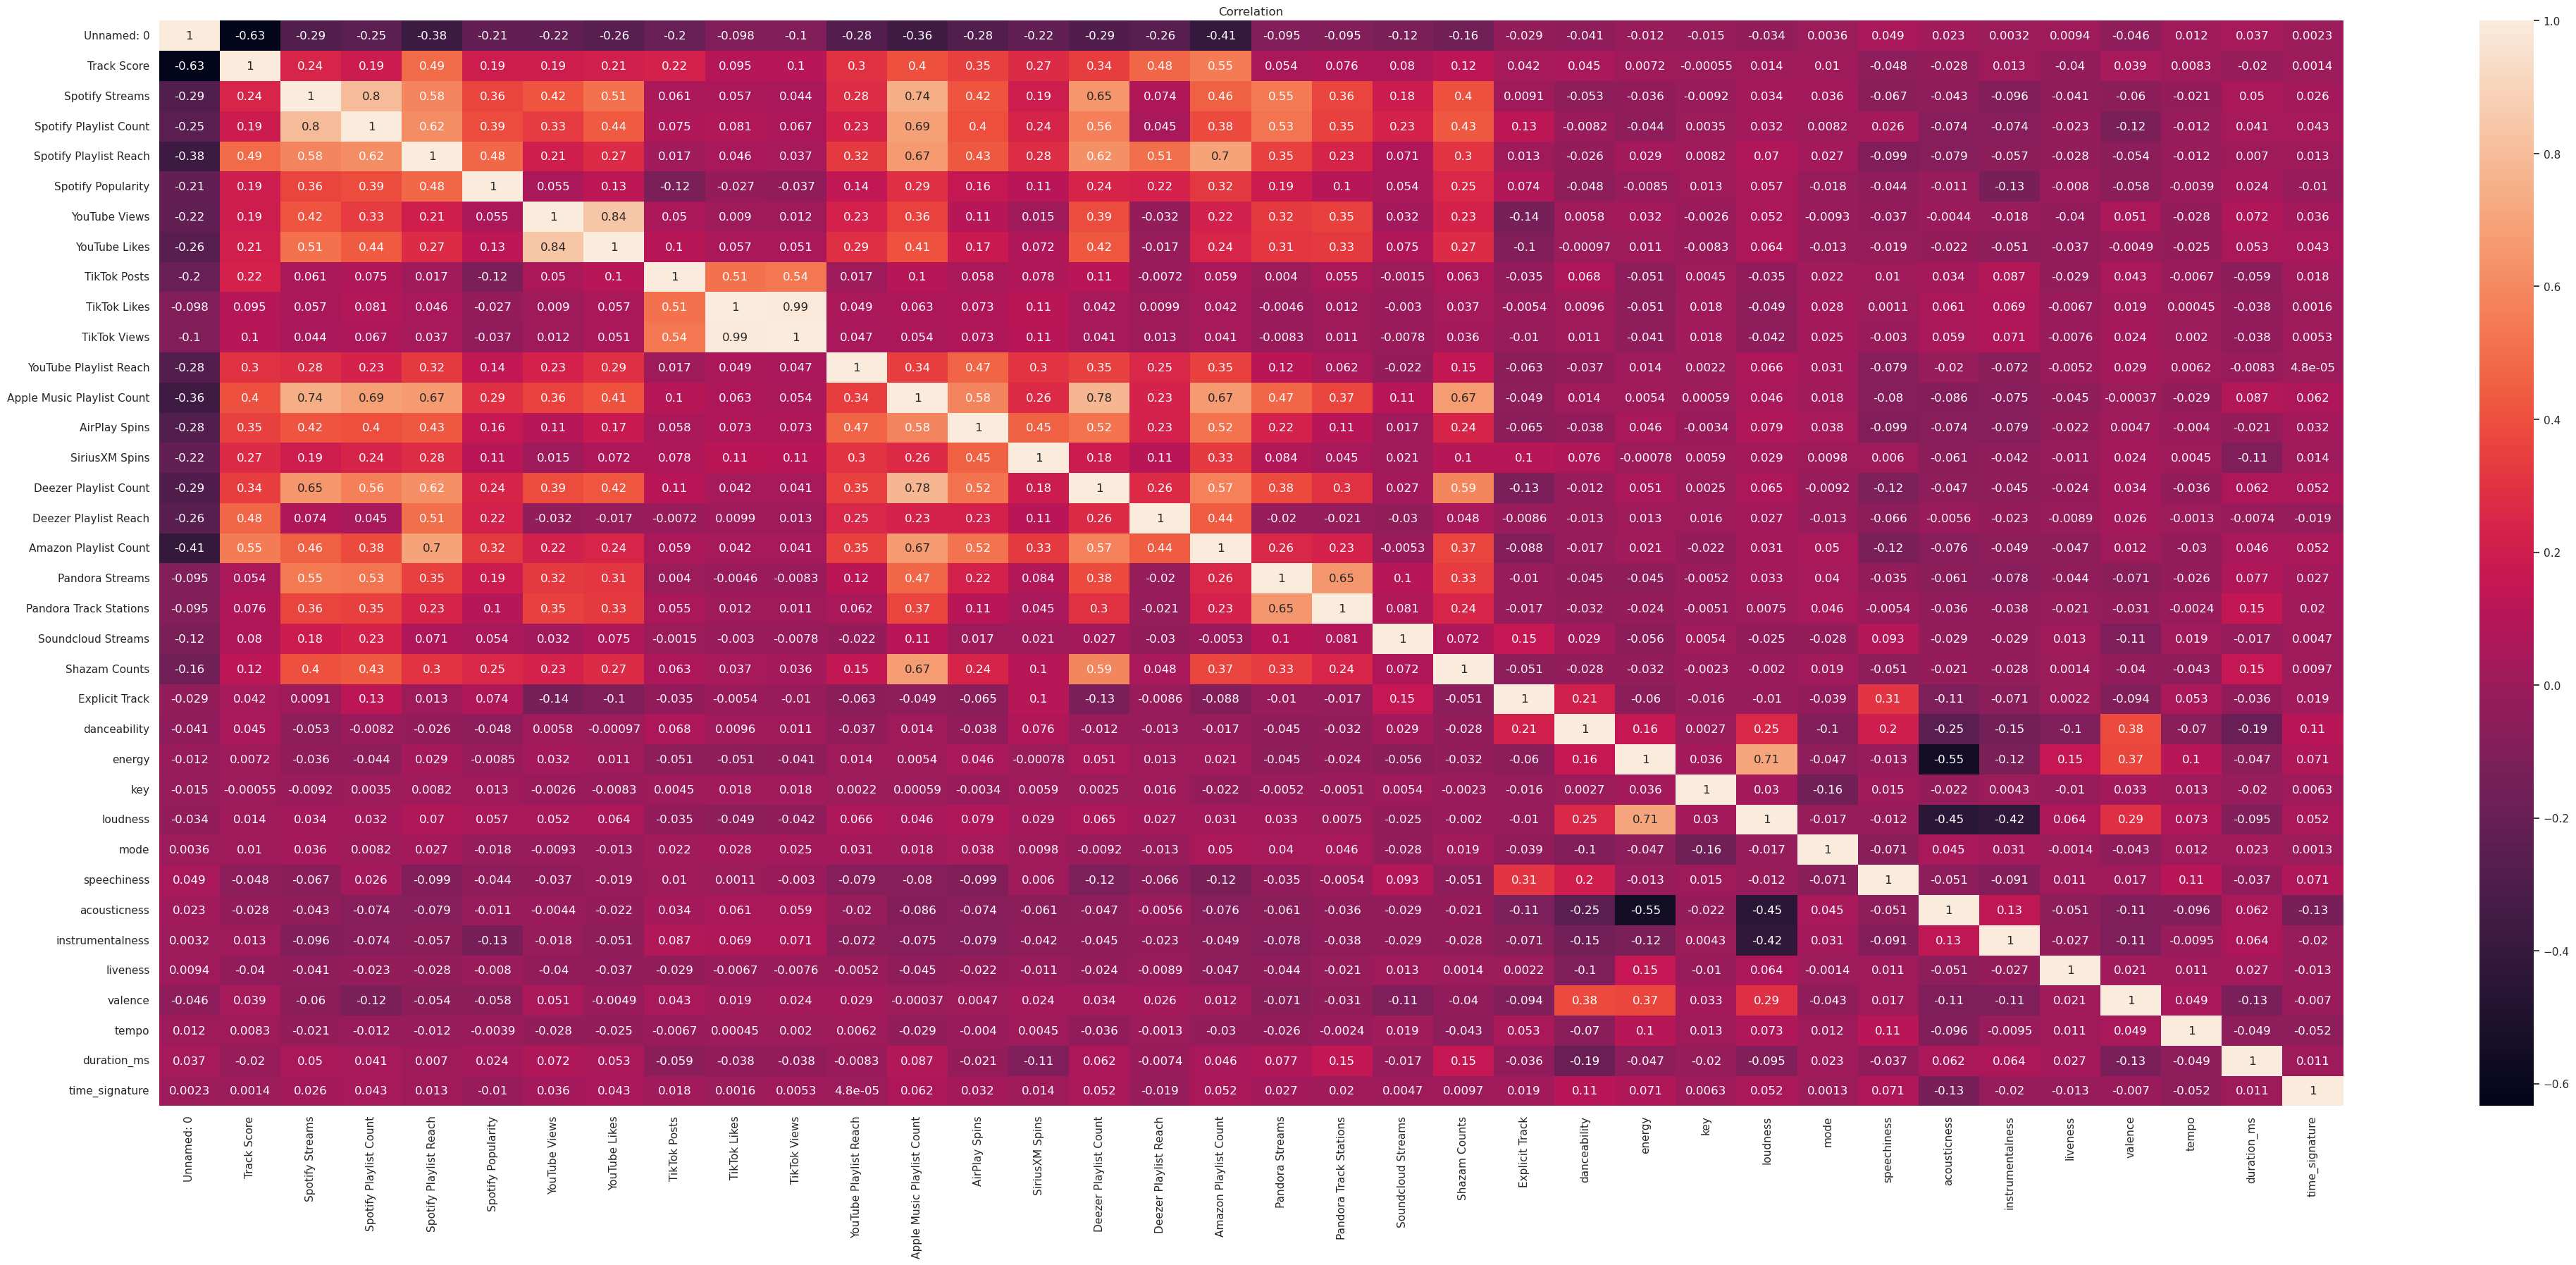

In [367]:
# Check heatmap 

corr_matrix = df_original[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(50, 20))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation')
plt.show()

### Processing categorical data @Cuong Nguyen for text enrichment

In [368]:
df = df_original

In [369]:
df.shape

(4600, 36)

In [370]:
#df = df.fillna(0)

In [371]:
#df.shape

In [372]:
for i in df.columns:
    try:
        df[i].astype(int)
    except:
        pass
       

###  Development/justification of “danceability binary”. Maybe multiclass would be more fun?

In [373]:
def danceability_classifier(x):
    '''
      Classifies the danceability param to either 1-low, 2-medium or 3-High
      Args:
      x: input decimal denoting deacneabiluty

      Returns:
       Either of the int values in 1,2,3 representing 1-low, 2-medium or 3-High

    '''
    if x >= 0.9:
        return 4
    elif 0.7 <= x  <0.9:
        return 3
    elif 0.4 <= x  <0.7:
        return 2
    else:
        return 1

### Standardized train, val, test splits

#### The data will be folowing 2 streams, the first with onehot encoded artist to check if there is a relation, and the other without

In [374]:
# Categorise the data set as Either danceable or not
#def danceable()
df['binary_danceability'] = df['danceability'].apply(danceability_classifier)


In [375]:
# Get the features and outcome variables separated for the onehot encoded dataset
Y=pd.DataFrame(df['binary_danceability'])
df.drop(['binary_danceability','danceability'],axis=1)
X=pd.DataFrame(df)

In [376]:
Y.head()

,binary_danceability
0,3
1,3
2,2
3,3
4,4


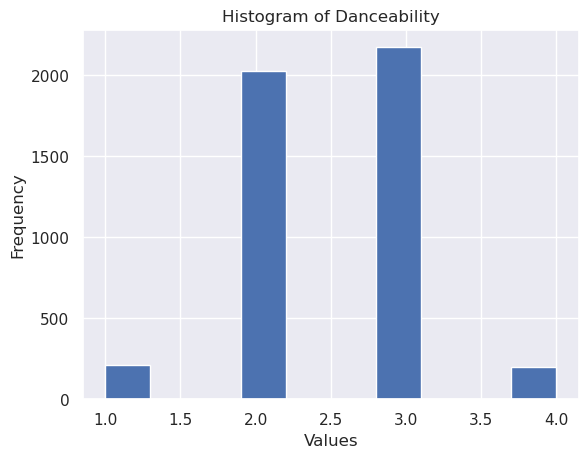

In [377]:
# Create the histogram for the Y column
plt.hist(Y)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Danceability')
plt.show()

In [378]:
X.head()

,Unnamed: 0,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,binary_danceability
0,0,725.4,390470936,30716,196631588,92.0,84274754,1713126,5767700,651565900,...,0.0,0.0439,0.097300,0.000370,0.0678,0.919,138.029,155152.0,4.0,3
1,1,545.9,323703884,28113,174597137,92.0,116347040,3486739,674700,35223547,...,1.0,0.0776,0.010700,0.000000,0.1410,0.214,101.061,274192.0,4.0,3
2,2,538.4,601309283,54331,211607669,92.0,122599116,2228730,3025400,275154237,...,1.0,0.0447,0.000938,0.010600,0.0826,0.747,151.647,142515.0,4.0,2
3,3,444.9,2031280633,269802,136569078,85.0,1096100899,10629796,7189811,1078757968,...,1.0,0.0633,0.058400,0.000070,0.0232,0.632,118.048,200600.0,4.0,3
4,4,423.3,107034922,7223,151469874,88.0,77373957,3670188,16400,0,...,0.0,0.0683,0.029200,0.000002,0.0582,0.889,127.003,227239.0,4.0,4


In [379]:
print("X shape:", X.shape,"Y shape:",Y.shape)

X shape: (4600, 37) Y shape: (4600, 1)


In [380]:
# Convert to numpy array
X=np.array(X)
Y=np.array(Y)

In [381]:
# Shuffle data
# NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator 
tf.random.set_seed(1234)
np.random.seed(1234)

# shuffle data
indices = np.arange(Y.shape[0])
np.random.shuffle(indices)

# Re-order using the list of shuffled indices
X = X[indices]
Y = Y[indices]

In [382]:
# Split the (X,Y) data into training and test paritions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

# EX2.2
# Print the shape of each array.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (2944, 37)
X_test shape: (920, 37)
X_val shape: (736, 37)
Y_train shape: (2944, 1)
Y_test shape: (920, 1)
Y_val shape: (736, 1)


In [383]:
# def baseline_model_artist_avg(input,training_data):
#   '''
  
#   '''
# use training data to develop 'prior beliefs' about Artists
training_data=pd.DataFrame(df_original)
lookups = training_data.groupby('Artist')['danceability'].mean().reset_index()

# but we can just use the avg across all 'popular' songs when we don't have a prior
filler = training_data['danceability'].mean().copy()

# merge prior beliefs onto new songs
res = pd.merge(training_data[['spotify_track_id','Artist']], lookups, how='left', on='Artist')
res['danceability'] = res['danceability'].fillna(filler)
res
  #return res.drop(columns=['Artist'])

KeyError: 'Artist'

In [384]:
# Baseline value assumes that danceable songs are energetic
# Therefore this baseline is when it is assumed that energy has a direct correlation to danceability

# Define bin edges similar to danceability classifier
bins = [0, 0.4, 0.7, 0.90, 1]
df_original['energy_binned_value'] = pd.cut(df_original['energy'], bins=bins, labels=False)
df_original['danceability_binned_value'] = pd.cut(df_original['danceability'], bins=bins, labels=False)

# Count occurrences of each bin
energy_bin_counts = df_original['energy_binned_value'].value_counts().sort_index()
danceability_bin_counts = df_original['danceability_binned_value'].value_counts().sort_index()

print(energy_bin_counts)
print(danceability_bin_counts)


# Calculate accuracy
accuracy = (df_original['energy_binned_value'] == df_original['danceability_binned_value']).mean()

print("\n Baseline accuracy:", accuracy)

energy_binned_value
0.0     384
1.0    2203
2.0    1682
3.0     299
Name: count, dtype: int64
danceability_binned_value
0.0     186
1.0    2026
2.0    2164
3.0     192
Name: count, dtype: int64

 Baseline accuracy: 0.41282608695652173


# Sci kit logistic regression model

In [385]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create the model
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model = HistGradientBoostingClassifier()
#model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.001, max_depth=5)

# Train the model
X_train.fill(0)
model.fit(X_train, Y_train)

# Make predictions
y_pred = model.predict(X_val)


# Evaluate the model
accuracy = accuracy_score(y_pred, Y_val)

print("\n Accuracy:", accuracy,"\n")


 Accuracy: 0.4904891304347826 



/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Random Forest

In [386]:
# Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
 
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, n_jobs=4, random_state=0, max_depth=5, bootstrap=False)

# Train the model
rf_classifier.fit(X_train, Y_train)

y_train_pred=rf_classifier.predict(X_train)
# Make predictions on the validation set
y_val_pred=rf_classifier.predict(X_val)


# Calculate accuracy
train_acc = accuracy_score(Y_train, y_train_pred)
val_acc = accuracy_score(Y_val, y_val_pred)

print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print ("\n")



/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training accuracy: 0.47384510869565216
Validation accuracy: 0.4904891304347826




In [387]:
# Testing the random forest model against the test data

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

#Loss
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae) 

Accuracy: 0.45
Mean Squared Error: 0.7097826086956521
Mean Absolute Error: 0.6032608695652174


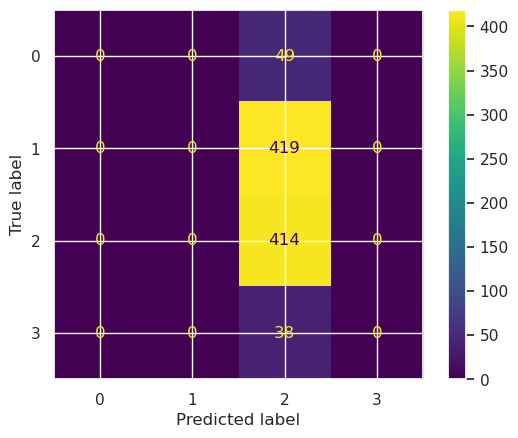

In [388]:
# Plot the confusion matrix for test data

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

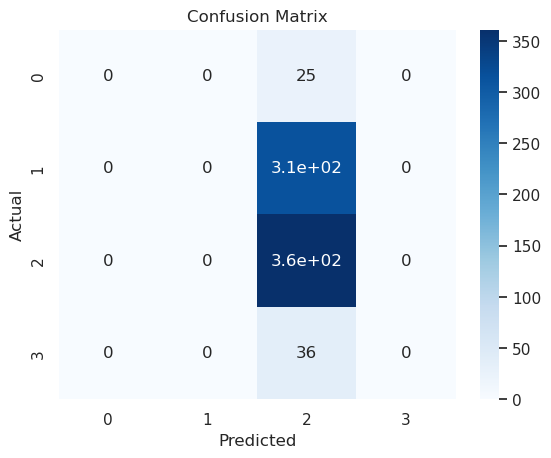

In [389]:
# Plot the confusion matrix for validation data

cm = confusion_matrix(Y_val, y_val_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Neural Network

In [390]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=64,        # hmn output dim
      #input_shape=(num_features,),  # hmn input dim
      input_dim=num_features,
      use_bias=True,               # use a bias (intercept) param
      activation='relu', # hmn
      kernel_initializer='Ones',  # initialize params to 1
      bias_initializer='Ones',    # initialize bias to 1
  ))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=1, activation='softmax'))
  
  # We need to choose an optimizer. 
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) 

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile( optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')
    
  return model

In [391]:
tf.random.set_seed(0)
# 2. Build and compile model
num_features = X_train.shape[1]
learning_rate = 0.001
epochs=20
model_tf=build_model(num_features, learning_rate)


# 3. Fit the model
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
results=model_tf.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val), verbose=True)

Epoch 1/20


/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 0.0000e+00 - val_accuracy: 0.0340 - val_loss: 0.0000e+00
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - lo

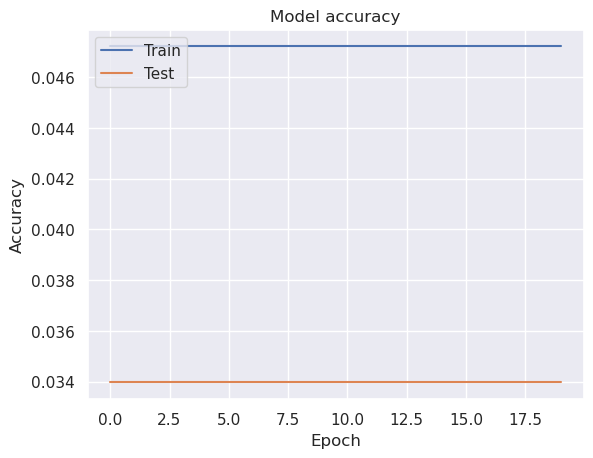

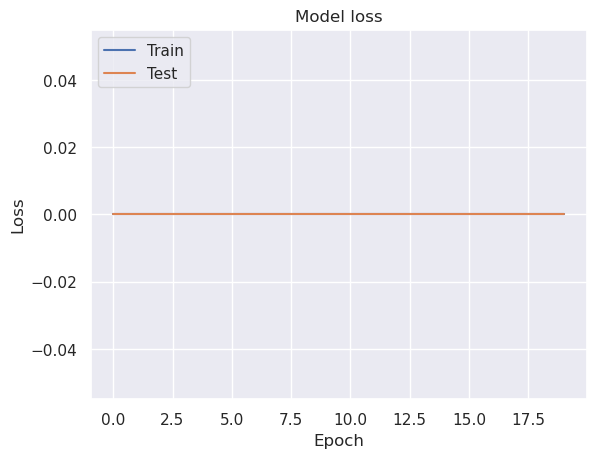

In [392]:
# Plot training history

plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [393]:
print("\nFirst 5 Learned Parameters:")
for layer in model_tf.layers:
    print("\n",layer.get_weights()[0][:5]),
    print("\nBias term:",layer.get_weights()[1])


# EX 10.3 The loss at the final epoch on both the mini training and validation datasets;
print("\nLoss at Final Epoch:")
print('\nTraining Loss: ', results.history['loss'][-1])
print('\nValidation Loss:', results.history['val_loss'][-1])

# EX 10.4 The percentage difference between the losses observed on the mini training and validation datasets
if results.history['loss'][-1] != 0 :
    loss_diff  =( results.history['loss'][-1]-results.history['val_loss'][-1] )/results.history['loss'][-1]
    print(f'\nLoss Difference (%):, {loss_diff * 100:.2f} %')


First 5 Learned Parameters:

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.

In [394]:
# Evaluate the model on the test data
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

test_loss, test_acc = model_tf.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0554 - loss: 0.0000e+00 
Test accuracy: 0.05326087027788162


/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/ubuntuv1/anaconda3/lib/python3.12/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
